<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/ds675/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to 100 so that Canvas gives the same weight to Assignments 2-6.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**You may use ChatGPT or other LLMs to help with this assignment.** (Unless the question specifically requests it, the use of LLMs is **optional**.) However, if you do use an LLM to help with a particular question, you must submit a full transcript of all your interactions with the LLM in the form of screenshots embedded in the text cells provided. You must also do this on your own &mdash; using the results of another person's LLM session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of the LLM's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

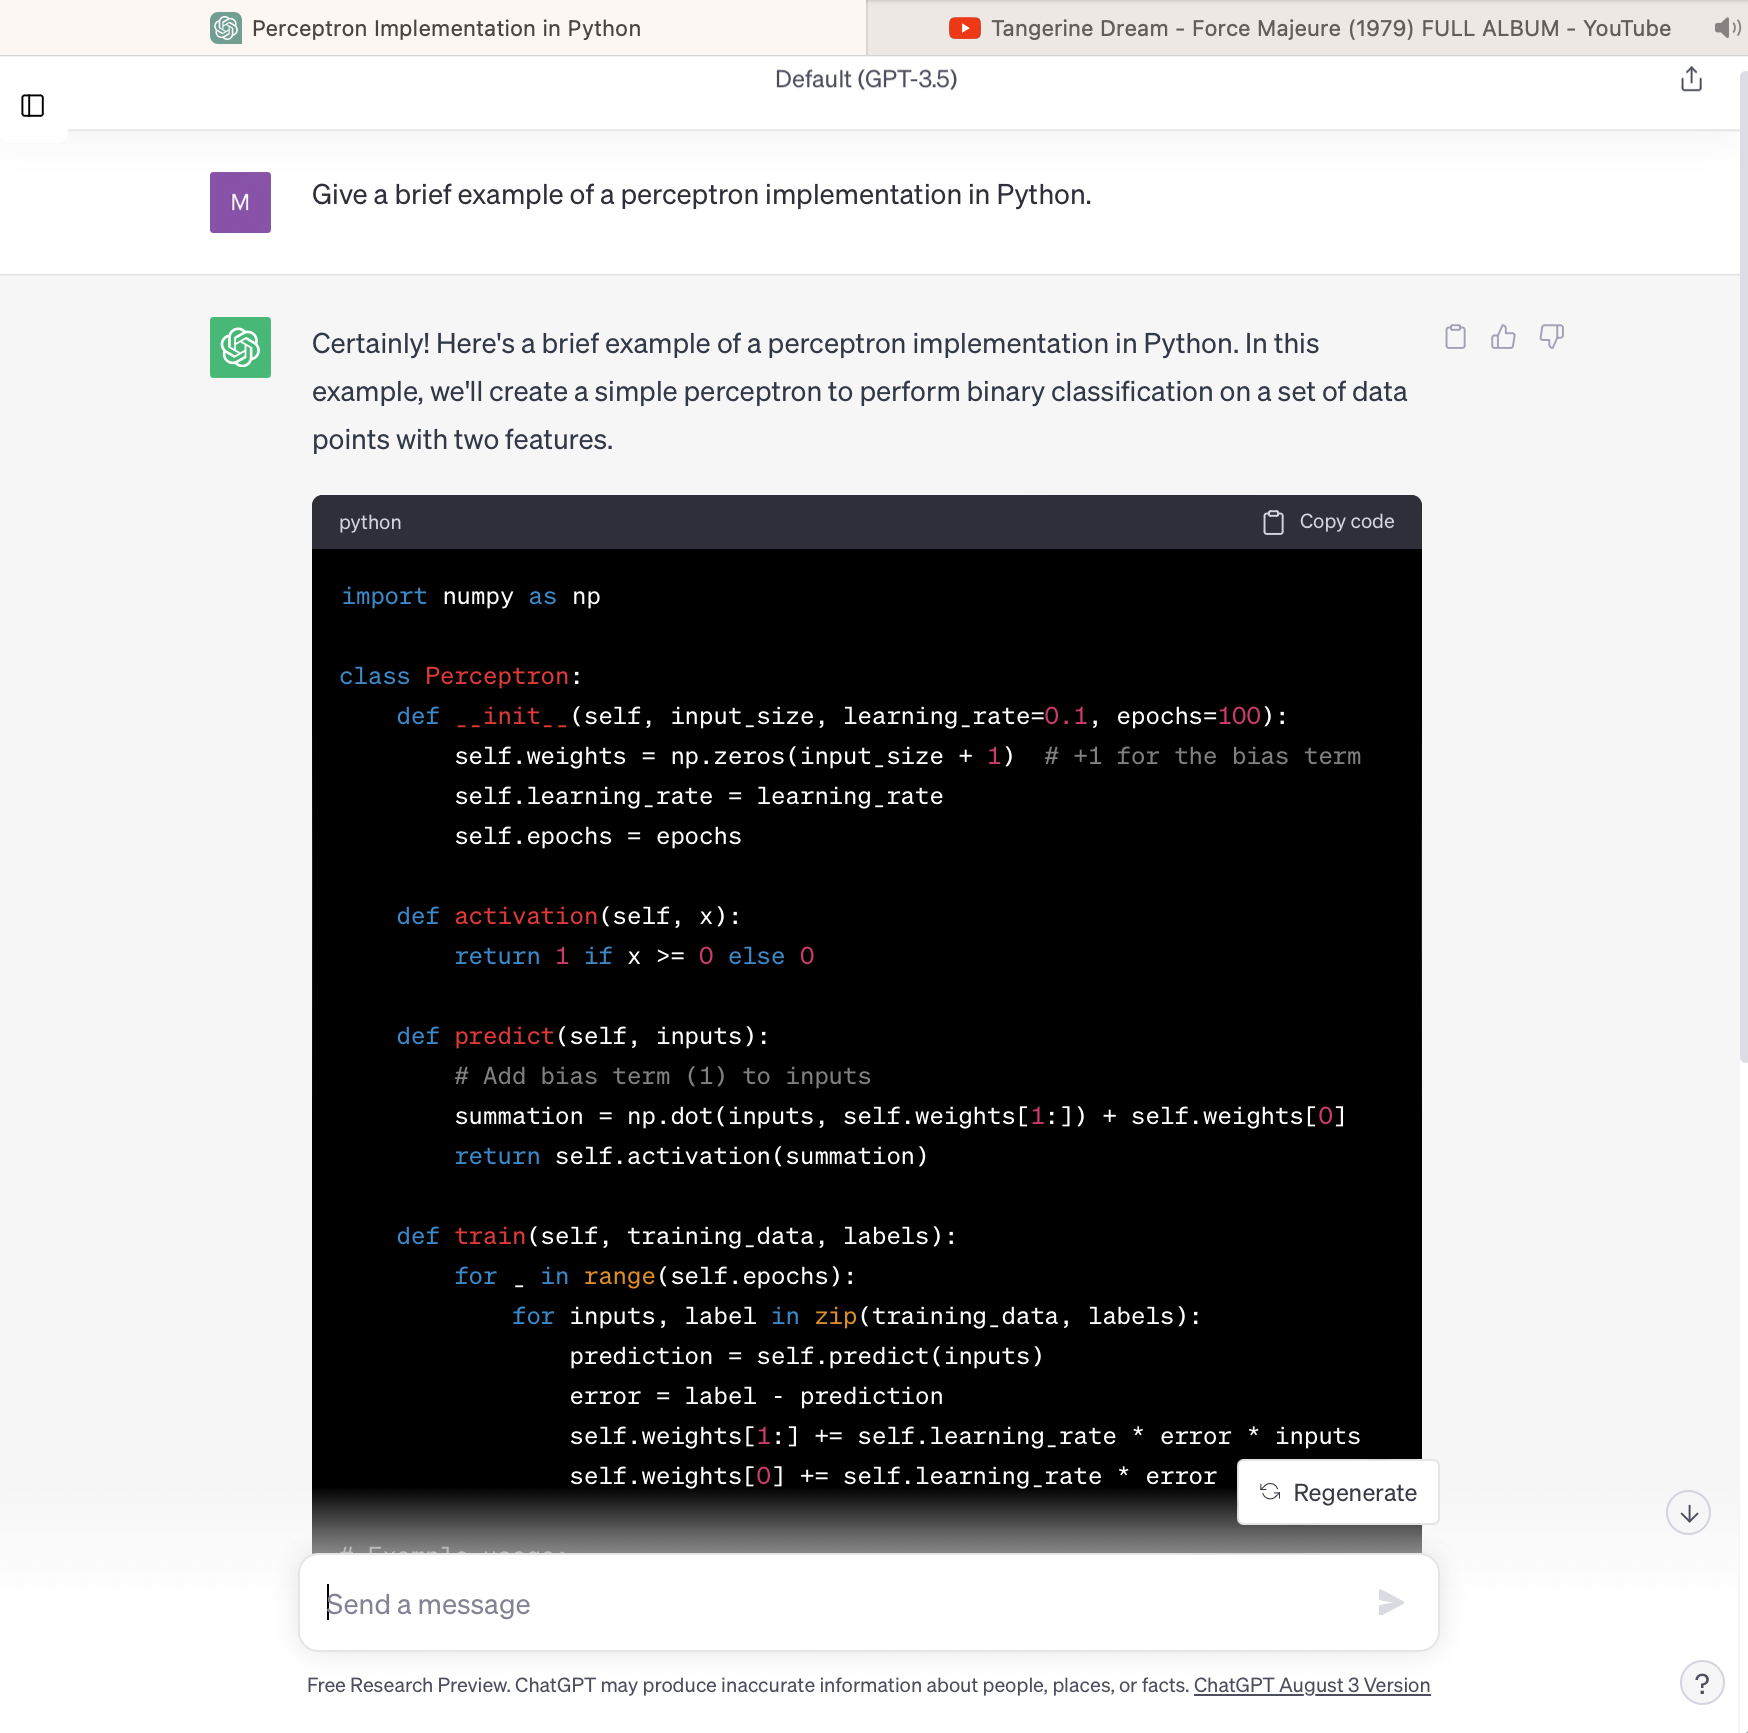

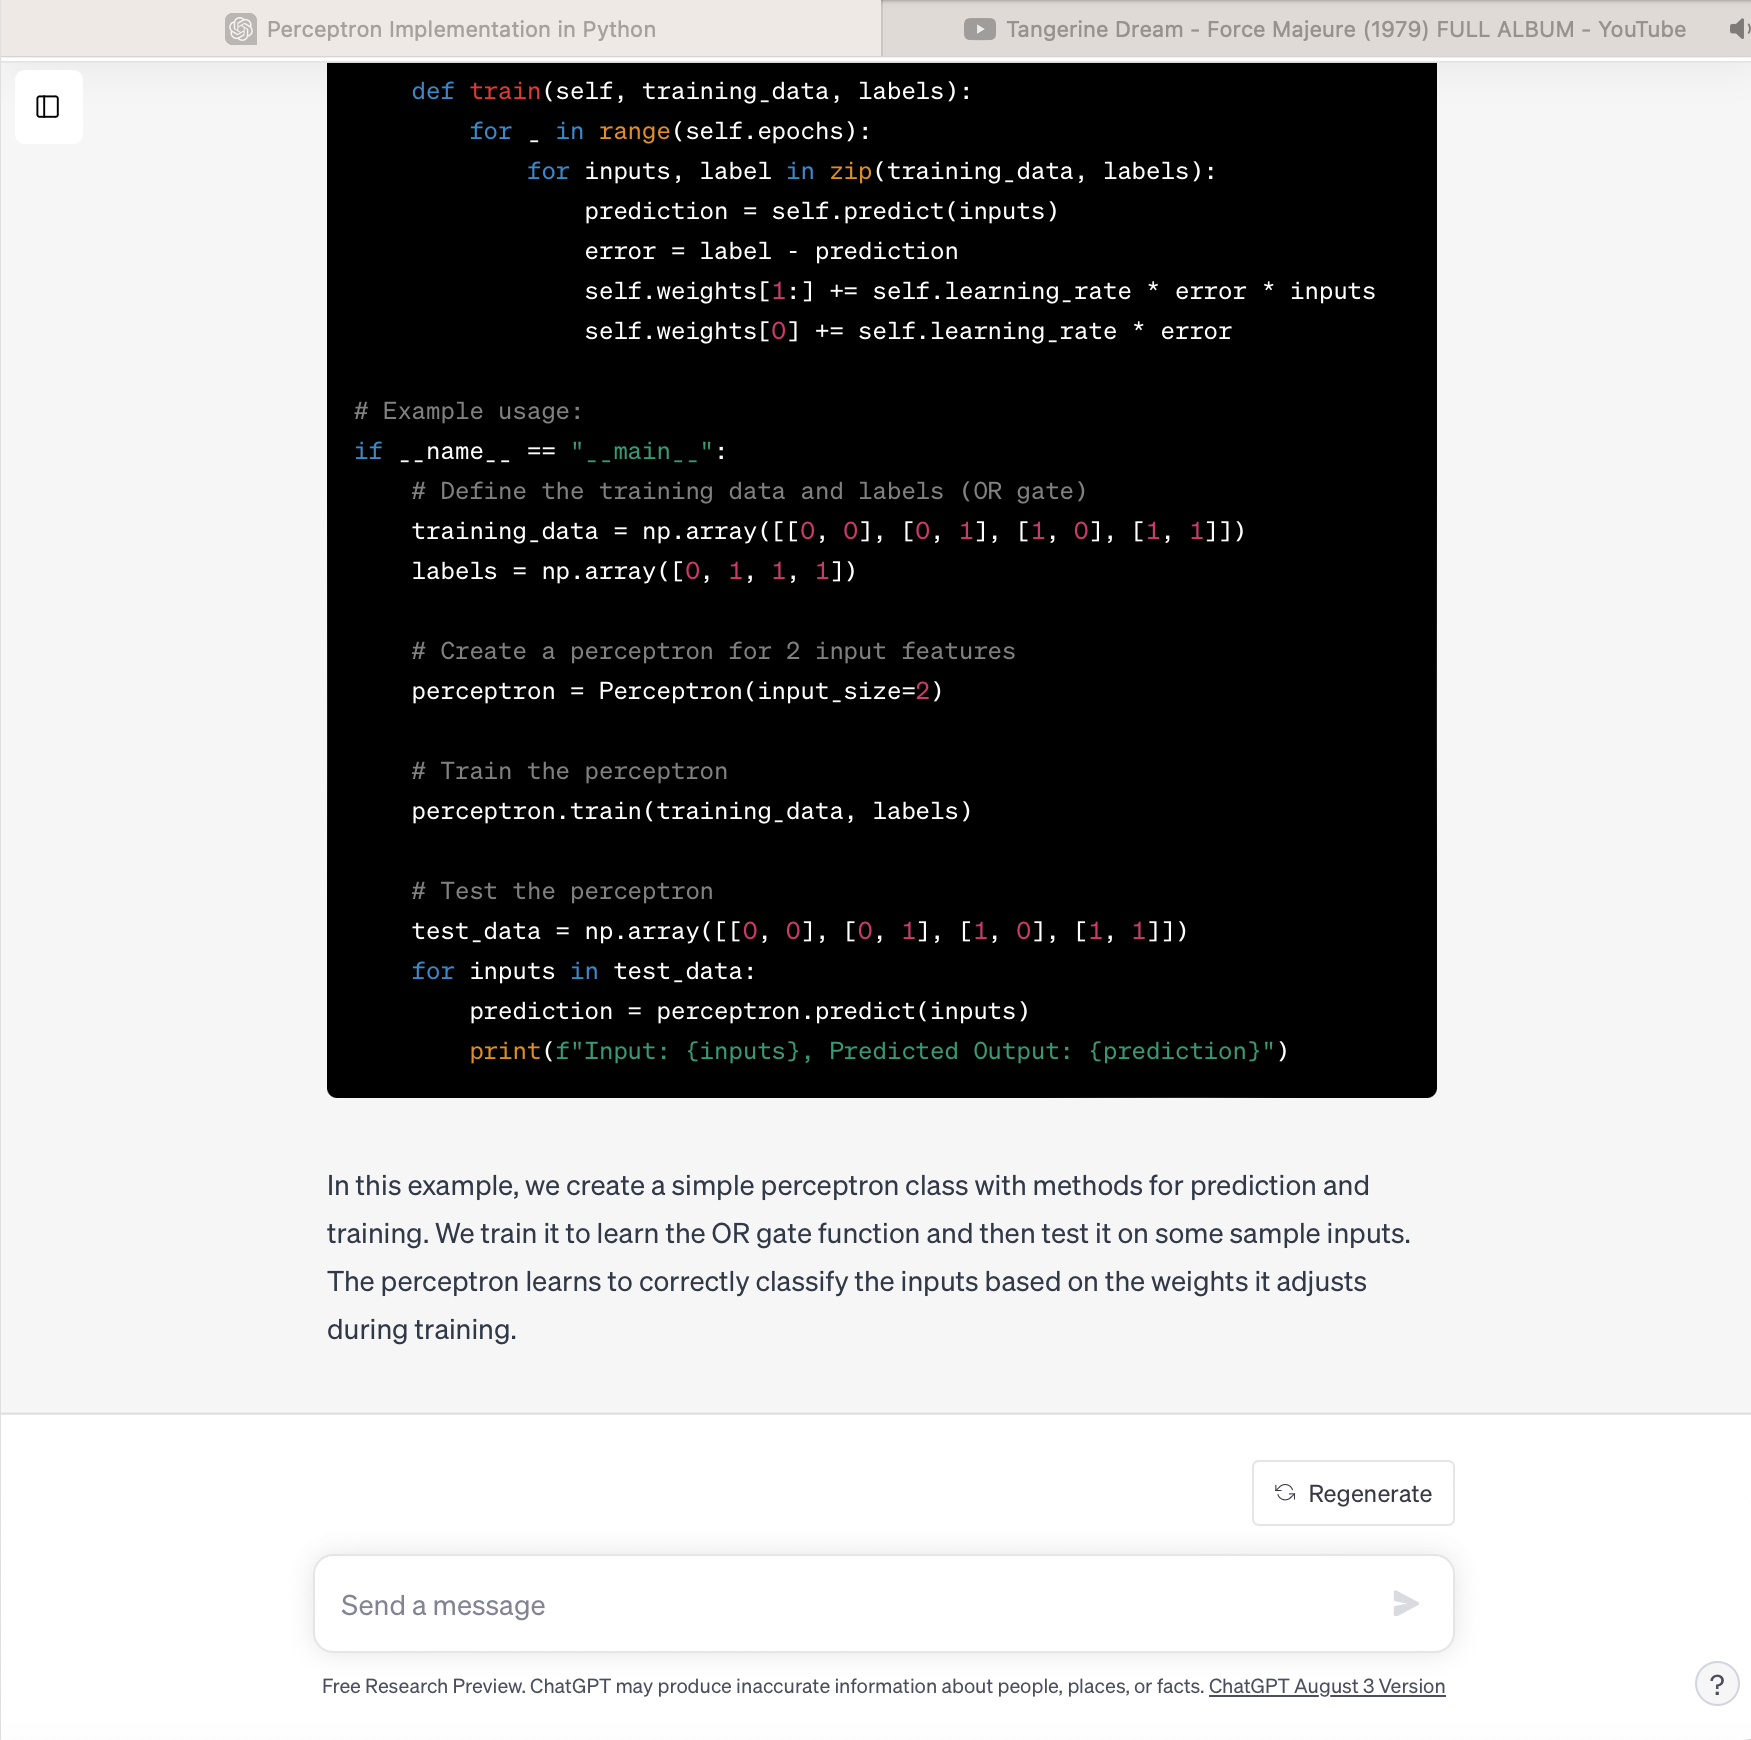

## Preparation Steps

In [27]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import Image

In [3]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


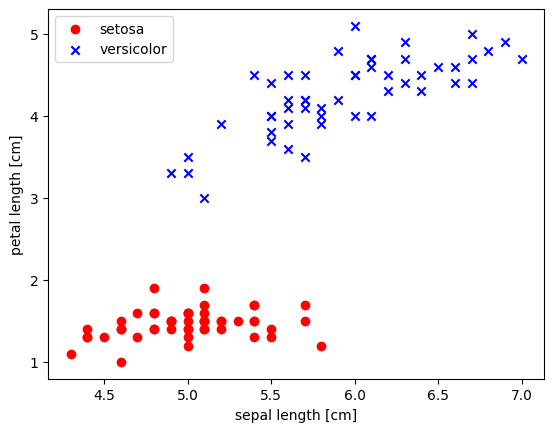

In [4]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0: Manual Perceptron Training**

Below you can see 5 points of the data set, all labeled as 'setosa'.

In [5]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w_0 = 5.0$, $w_1 = -0.1$, $w_2 = 4.5$. Here $w_0$ is the bias.

Write the weights after processing data points 5, 6, 7, and show all your calculations (with $\eta = 0.1$ and noting that $y,\hat{y}\in\{-1,1\}$):

Please give your answers in the cell below.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [6]:
x = X[5:8]
Y = y[5:8]

print('x is \n{}'.format(x))
print('\ny is \n{}'.format(Y))

w0 = 5.0
w1 = -0.1
w2 = 4.5
eta = 0.1

w = np.asarray([w1, w2])

print('\nWeights are {}'.format(w))

x is 
[[5.4 1.7]
 [4.6 1.4]
 [5.  1.5]]

y is 
[-1 -1 -1]

Weights are [-0.1  4.5]


In [7]:
for j in range(len(x)):
  print('This is #{} point'.format(j))
  print('W0 is {}, x is {} and weights are {}'.format(w0,x[j],[w.T]))
  z = w0 + np.dot(x[j],w)
  print('Value of perceptron equation is {}'.format(z))
  if z >= 0:
    y_cal = 1
  else:
    y_cal = -1
  if y_cal == y[j]:
    print('It is fine')
  else:
    print('Needs to be updated')
    w0 = w0 - eta*(y_cal - y[j])
    for k in range(len(w)):
      w[k] = w[k] - eta*(y_cal-y[j])*x[j][k]
    print('Updated bias is {}'.format(w0))
    print('Updated weights are {}'.format(w))



This is #0 point
W0 is 5.0, x is [5.4 1.7] and weights are [array([-0.1,  4.5])]
Value of perceptron equation is 12.11
Needs to be updated
Updated bias is 4.8
Updated weights are [-1.18  4.16]
This is #1 point
W0 is 4.8, x is [4.6 1.4] and weights are [array([-1.18,  4.16])]
Value of perceptron equation is 5.196
Needs to be updated
Updated bias is 4.6
Updated weights are [-2.1   3.88]
This is #2 point
W0 is 4.6, x is [5.  1.5] and weights are [array([-2.1 ,  3.88])]
Value of perceptron equation is -0.08000000000000007
It is fine


In [7]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
# M[0,1] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1: Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [9]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

            ###### New code for doing nothing. - MEH
            this_code_does_nothing = True
            ######

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


There is a significant error in the above perceptron implementation. Work on the above cell and modify the code so that:

(i) The line containing the error is commented out, and a new line is added with corrected code.<br>
(ii) The fit function stops when no more iterations are necessary. <br>
(iii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training. <br>
(iv) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

At each place where you have modified the code, please add clear comments surrounding it, similarly to the "do-nothing" code. Make sure you evaluate the cell again, so that following cells will be using the modified perceptron.


In [8]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        ###### Code for initializing number of training iterations and history of weights
        self.training_iter = 0
        self.weightHistory = [self.w_.copy()]
        ######
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #### Code to calculate the value of the perceptron
                valueOfPerceptron = self.predict(xi)
                ###### Code to check if the predicted value differs from the target value, if so, then we update the weights and their history.
                if valueOfPerceptron != target:
                  update = self.eta * (target - valueOfPerceptron)
                  errors += 1
                  self.w_[1:] += update * xi
                  self.w_[0] += update
                  self.weightHistory.append(self.w_.copy())
                ######
            ###### Code to increment the counter for number of training iterations and updat the list that tracks the number of errors in each iteration of the dataset
            self.training_iter += 1
            self.errors_.append(errors)
            ######
            ###### Code to break the loop after convergence
            if errors == 0:
              break
            ######
            ###### New code for doing nothing. - MEH
            this_code_does_nothing = True
            ######

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[1,1] =
# M[1,2] =
# M[1,3] =
# M[1,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 2: Experimenting with hyperparameters**

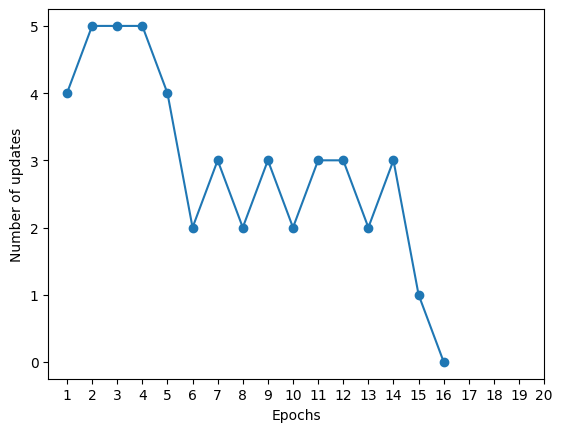

In [39]:

ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

Running the above code, you can verify whether your modification in Question 1 works correctly. The point of this question is to experiment with the hyperparameter $\eta$, the learning rate. Here are some specific questions:
<br>

(i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge. <br>
(ii) Is it always the case that raising $\eta$ leads to a reduced (or equal) number of iterations? Explain with examples. <br>
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of $\eta$. <br>
(iv) Based on your experiences in parts (i)-(iii), would **binary search** be an appropriate strategy for determining values of $\eta$ for which the perceptron converges within a desired number of iterations?

Please give your answers in the cell below.

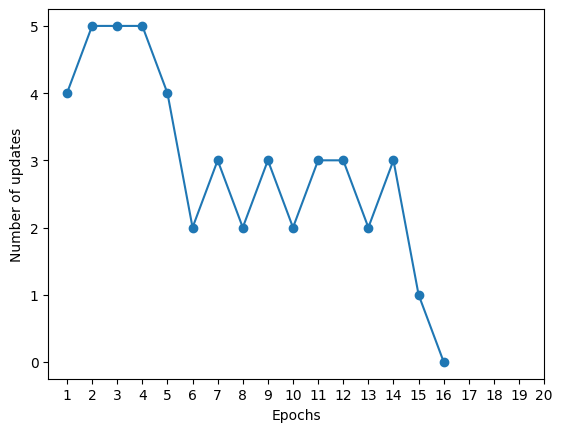

In [9]:

perc = Perceptron(eta=0.0001, n_iter=20, random_state=1)

perc.fit(X, y)

plt.plot(range(1, len(perc.errors_) + 1), perc.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

In [ ]:
values_Of_Eta = np.arange(0.0001, 1, 0.0001)
len(values_Of_Eta)

9999

In [ ]:
def eta_vs_iterations(X, y, values_of_eta, n_iter=50, random_state=1):
    iterations = []
    etas = []

    for eta in values_of_eta:
        perc = Perceptron(eta=eta, n_iter=n_iter, random_state=random_state)
        perc.fit(X, y)
        iterations.append(perc.training_iter)
        etas.append(eta)

    return etas, iterations

etas, iterations = eta_vs_iterations(X, y, values_Of_Eta)


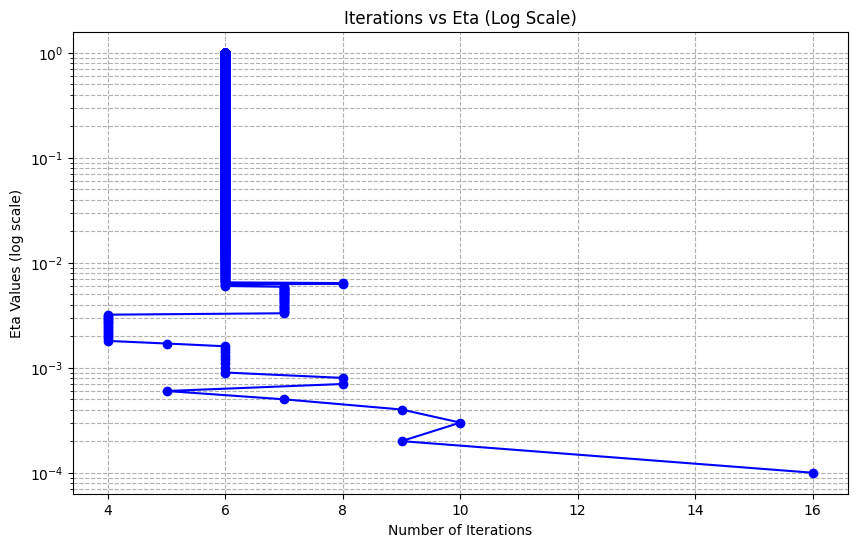

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, etas, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.title('Iterations vs Eta (Log Scale)')
plt.ylabel('Eta Values (log scale)')
plt.xlabel('Number of Iterations')
plt.grid(True, which="both", ls="--")
plt.show()



### NOTE - This approach involves ploting the graph and then finding the values of corresponding ETA. Binary search has been implemented after (iii) and includes the prompts from GPT4 as well.
(i) Eta for epoch = 10

In [ ]:
dictionary = dict(zip(etas, iterations))

for key, value in dictionary.items():
  if value == 10:
    print(key)

0.00030000000000000003


(ii) As we increase eta from 10^-4, epoch does decrease at the next value. It then increases to 10. Next it continuously decreases, then shows an erratic trend until it finally settles at epoch = 6.

### Another attempt build upon the output graph of the previous graph.
We should observe epoch values for eta values below 10^-4.

In [ ]:
values_Of_Eta = np.arange(0.000001, 1, 0.0001)
len(values_Of_Eta)

10000

In [ ]:
etas, iterations = eta_vs_iterations(X, y, values_Of_Eta)

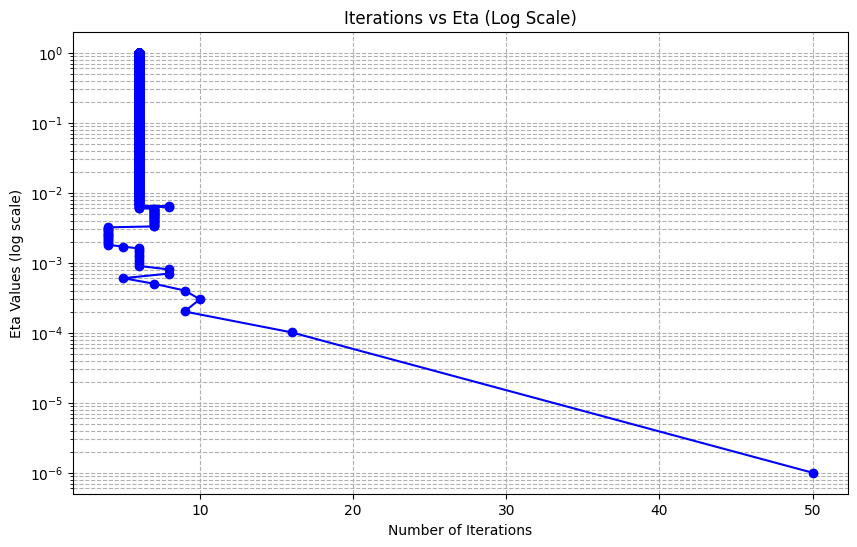

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, etas, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.title('Iterations vs Eta (Log Scale)')
plt.ylabel('Eta Values (log scale)')
plt.xlabel('Number of Iterations')
plt.grid(True, which="both", ls="--")
plt.show()


It could be possible that the perceptron didn't converge here.

In [ ]:
values_Of_Eta = np.arange(0.00001, 1, 0.00001)
len(values_Of_Eta)

99999

In [ ]:
etas, iterations = eta_vs_iterations(X, y, values_Of_Eta)

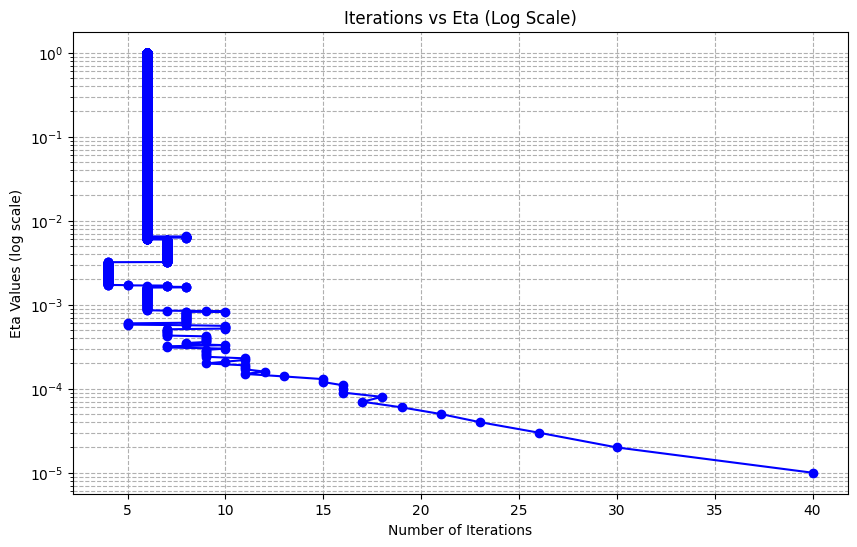

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, etas, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.title('Iterations vs Eta (Log Scale)')
plt.ylabel('Eta Values (log scale)')
plt.xlabel('Number of Iterations')
plt.grid(True, which="both", ls="--")
plt.show()


(i) Eta for epoch = 40 and 30

In [ ]:
left_values = [20, 30, 40]

dictionary = dict(zip(etas, iterations))
for key, value in dictionary.items():
  if value in left_values:
    print('Epoch value of {} is observed for eta = {:.6f}'.format(value,key))

Epoch value of 40 is observed for eta = 0.000010
Epoch value of 30 is observed for eta = 0.000020


In [ ]:
for key, value in dictionary.items():
  if 16 < value < 25:
    print(value,key)

23 4e-05
21 5e-05
19 6e-05
17 7.000000000000001e-05
18 8e-05


In [ ]:
etanew = (5e-5 + 6e-05)/2.0
print(etanew)

5.5e-05


In [ ]:
perc = Perceptron(eta=etanew, n_iter=50, random_state=1)
perc.fit(X, y)
perc.training_iter

19

(i) Eta for epoch = 20

In [ ]:
etanew = (6e-5 + 4.75e-05)/2.0
print(etanew)

5.3750000000000005e-05


In [ ]:
perc = Perceptron(eta=0.0000537, n_iter=50, random_state=1)
perc.fit(X, y)
perc.training_iter

20

In [ ]:
perc = Perceptron(eta=0.000053, n_iter=50, random_state=1)
perc.fit(X, y)
perc.training_iter

16

While we manage to find the value of eta for epoch = 20, notice that a change of 7e-7 reduces our epoch value by 4 iterations.  

In [ ]:
eta10 = 0.00030000000000000003
perc = Perceptron(eta=eta10, n_iter=50, random_state=1)
perc.fit(X, y)
perc.training_iter

10

In [ ]:
eta20 = 0.000010
perc = Perceptron(eta=eta20, n_iter=50, random_state=1)
perc.fit(X, y)
perc.training_iter

40

(iii) Two different settings for the random state, that give different convergence patterns for the same value of $\eta$

In [ ]:
eta30 = 0.000020
perc = Perceptron(eta=eta30, n_iter=50, random_state=1)
perc.fit(X, y)
perc.training_iter

30

In [ ]:
perc = Perceptron(eta=eta30, n_iter=50, random_state=42)
perc.fit(X, y)
perc.training_iter

2

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(iv) From the above sets of experimental evaluations, (especially the cells used to calculate eta value for epoch = 20) it is clear that the trend observed in the graph of Epoch vs Eta is an inverse relation, however, it depends on the sensitivity of the change in value of eta. Basically, for eta1, if the next value is considered as eta1 + 0.000001, it is possible for it to converge with an epoch greater than for eta1 + 0.0000011 eventhough it is a bigger number. <br>

Binary Search is useful when the given dataset is sorted, which is the case for epoch >= 20 for our most recent graph, that increments eta by 0.00001. If we could handle the sensitivity of eta, we could utilise binary search.

Note: The above experimentation technique took around 30 minutes.

I've utilised ChatGPT 4 for the code for binary search.


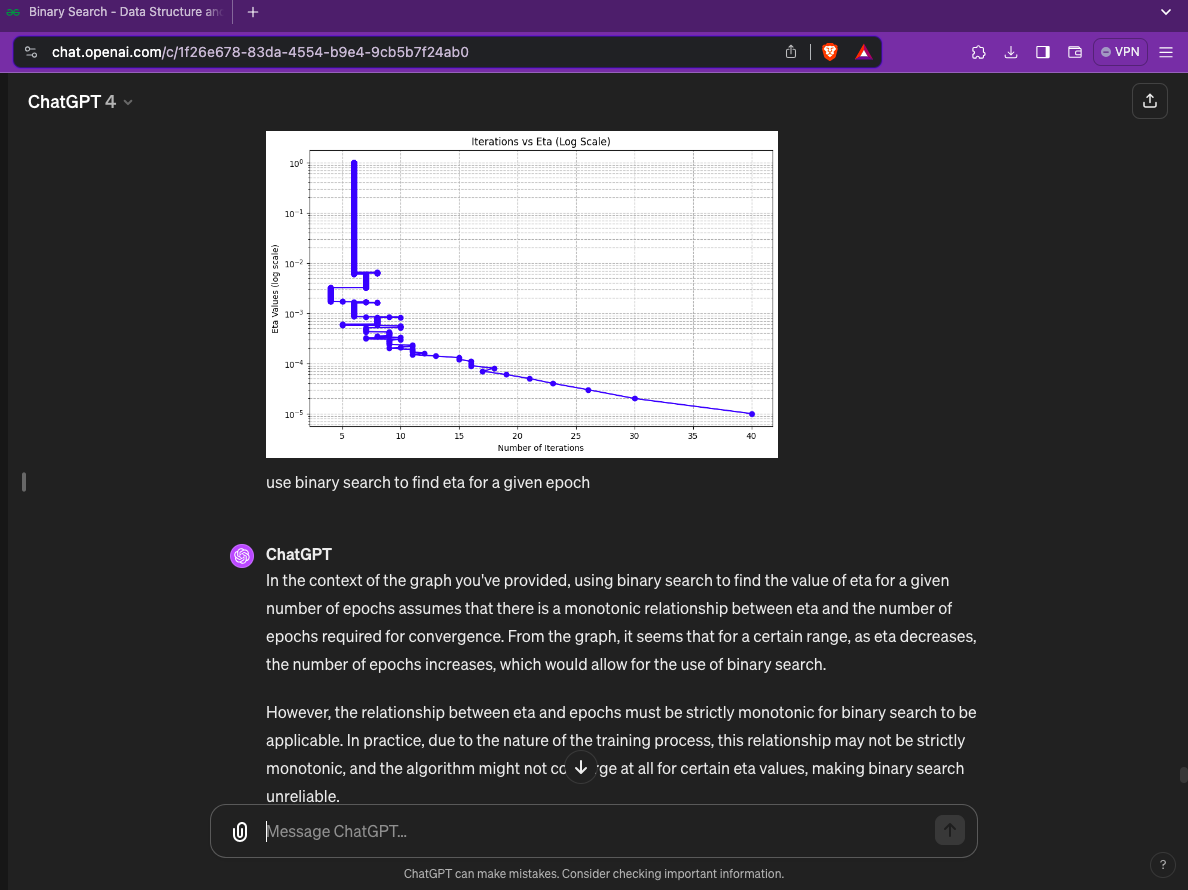

In [12]:
Image('/content/drive/MyDrive/ML/assignment2/Screenshot 2024-02-25 at 4.36.37 AM.png')


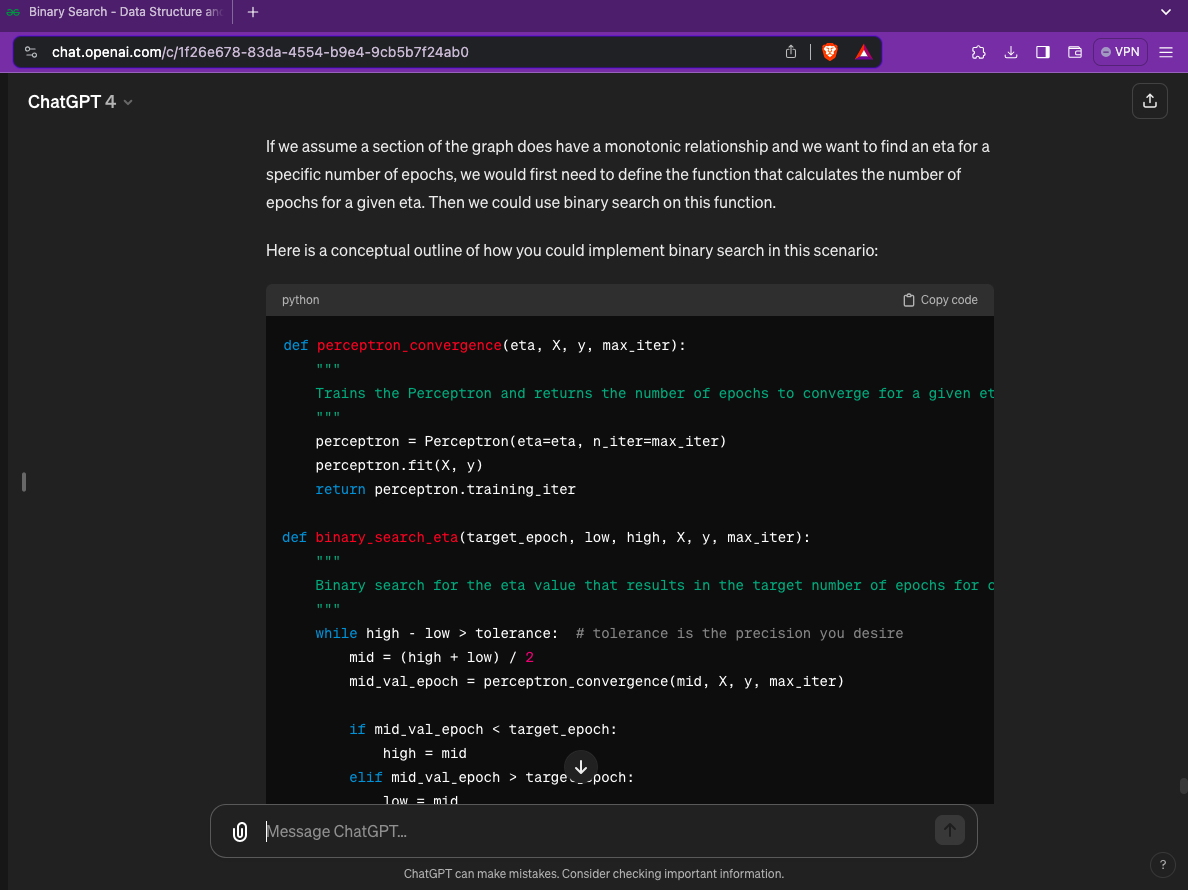

In [13]:
Image('/content/drive/MyDrive/ML/assignment2/Screenshot 2024-02-25 at 4.36.45 AM.png')


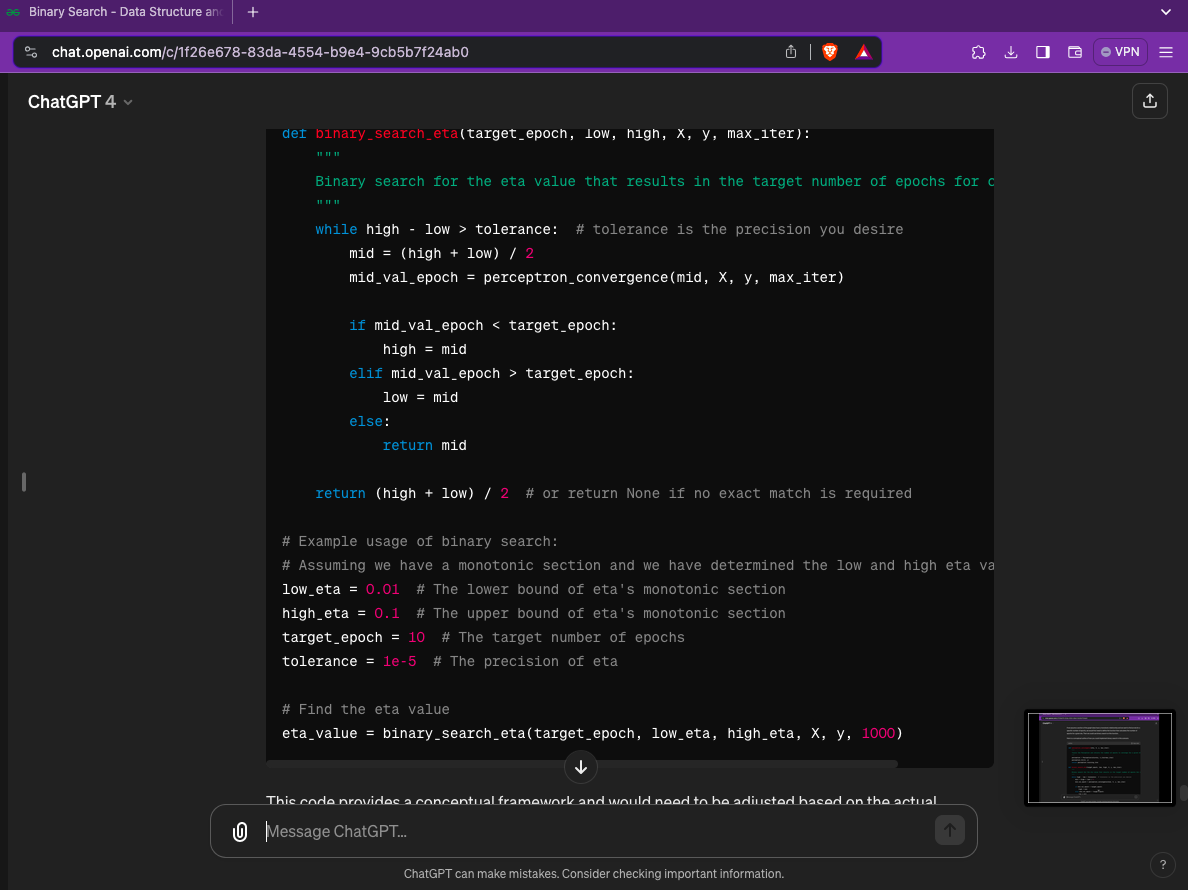

In [14]:
Image('/content/drive/MyDrive/ML/assignment2/Screenshot 2024-02-25 at 4.36.50 AM.png')


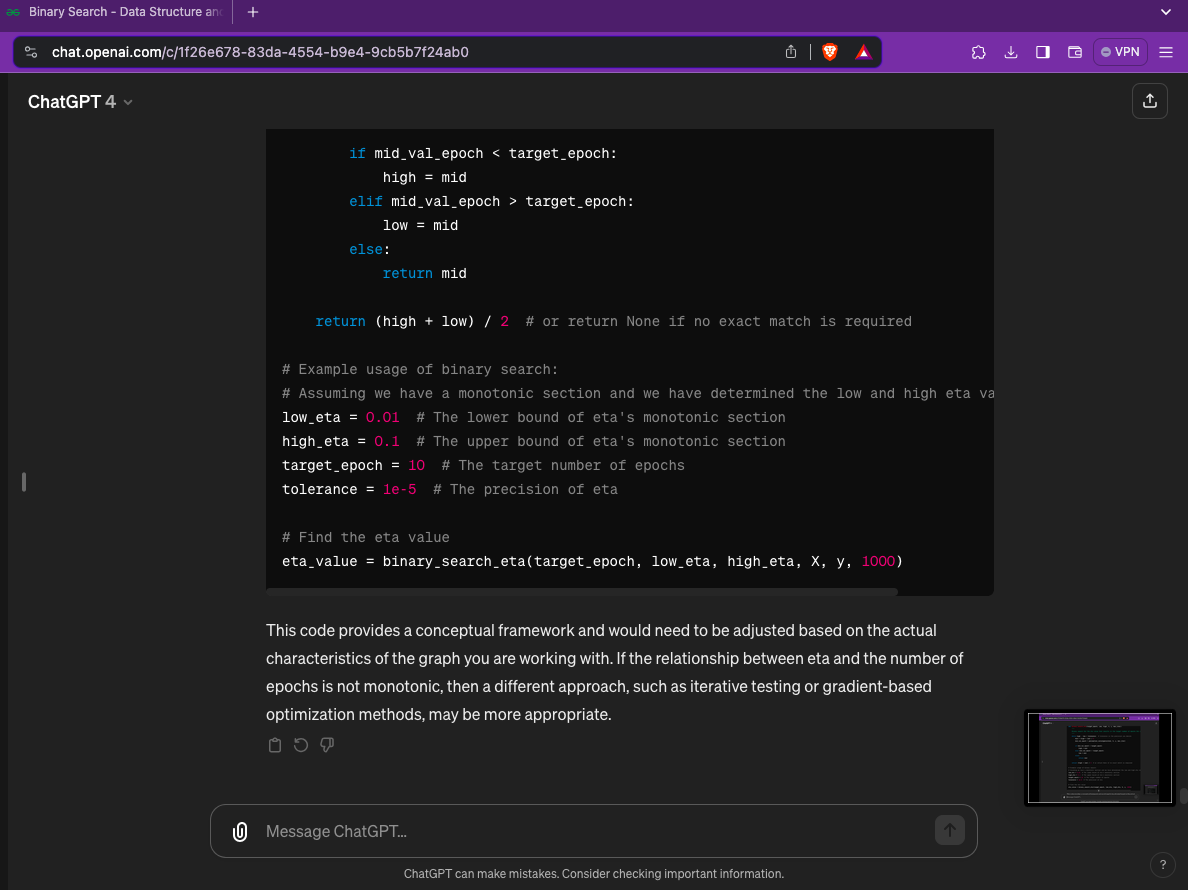

In [15]:
Image('/content/drive/MyDrive/ML/assignment2/Screenshot 2024-02-25 at 4.36.55 AM.png')

### Code from GPT4

In [10]:
import numpy as np

# Assuming the Perceptron class is already defined as provided in previous interactions

def perceptron_convergence(eta, X, y, max_iter):
    """
    Trains the Perceptron and returns the number of epochs to convergence for a given eta.
    """
    perceptron = Perceptron(eta=eta, n_iter=max_iter, random_state=1)
    perceptron.fit(X, y)
    return perceptron.training_iter

def binary_search_eta(target_epoch, low, high, X, y, max_iter, tolerance=1e-5):
    """
    Binary search for the eta value that results in the target number of epochs for convergence.
    """
    while high - low > tolerance:
        mid = (high + low) / 2
        mid_val_epoch = perceptron_convergence(mid, X, y, max_iter)

        if mid_val_epoch < target_epoch:
            high = mid
        elif mid_val_epoch > target_epoch:
            low = mid
        else:
            return mid

    return (high + low) / 2  # or return None if no exact match is required

# Example usage of binary search
# Define your X, y data here, as well as max_iter if different from 1000
low_eta = 0.00001  # The lower bound of eta's monotonic section
high_eta = 0.01  # The upper bound of eta's monotonic section
target_epoch = 10  # The target number of epochs
tolerance = 1e-6  # The precision of eta

# Find the eta value
eta_value10 = binary_search_eta(target_epoch, low_eta, high_eta, X, y, 50, tolerance)
eta_value20 = binary_search_eta(20, low_eta, high_eta, X, y, 50, tolerance)
eta_value30 = binary_search_eta(30, low_eta, high_eta, X, y, 50, tolerance)
eta_value40 = binary_search_eta(40, low_eta, high_eta, X, y, 50, tolerance)

In [11]:
eta_value10

0.0002051171875

In [12]:
eta_value20

4.90234375e-05

In [13]:
eta_value30

2.0975341796875e-05

In [14]:
eta_value40

1.0914611816406252e-05

The above approach took <4 minutes to implement it. We do observe a marginal change in the values.


In [ ]:
# Grader's area

maxScore = maxScore +4
# M[2,1] =
# M[2,2] =
# M[2,3] =
# M[2,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

Here is the function for visualizing decision regions.

In [10]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

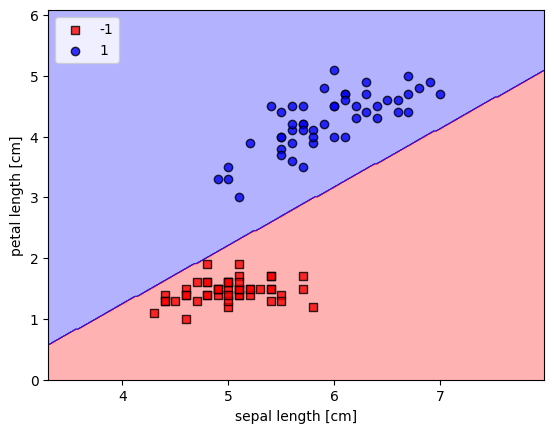

In [42]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 10 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

### Solution for this

From the graphs plotted in the previous question, we know that the perceptron converges at epoch = 6 for the given alpha.

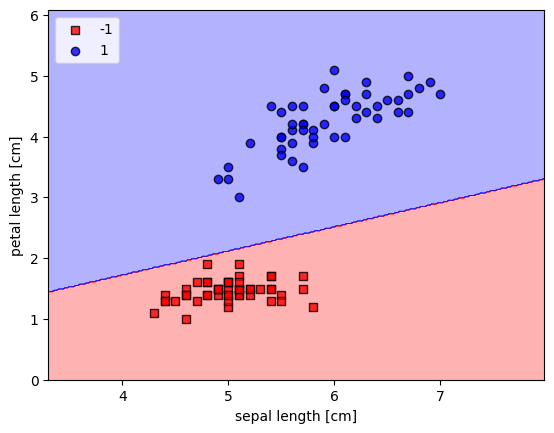

In [16]:
perc =  Perceptron(eta=0.01, n_iter=10, random_state=1)
perc.fit(X,y)
plot_decision_regions(X, y, classifier=perc)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [17]:
perc.training_iter

6

### Visualing the graph after each epoch.

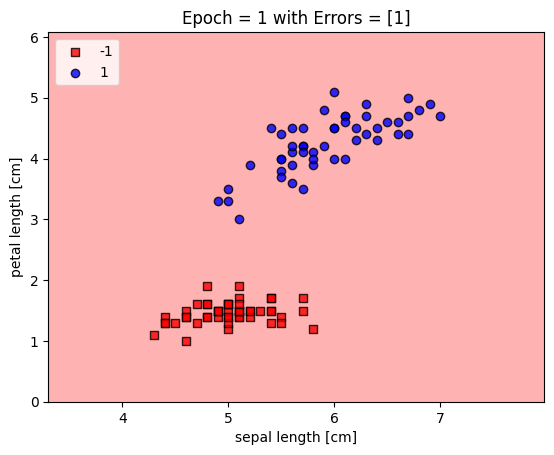

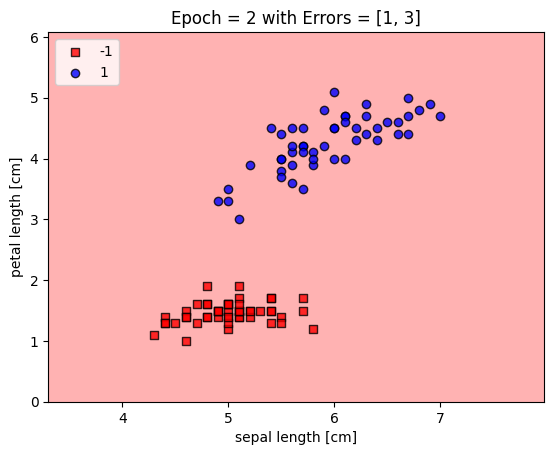

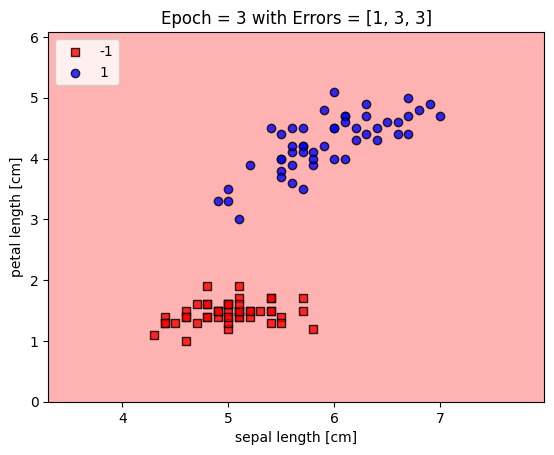

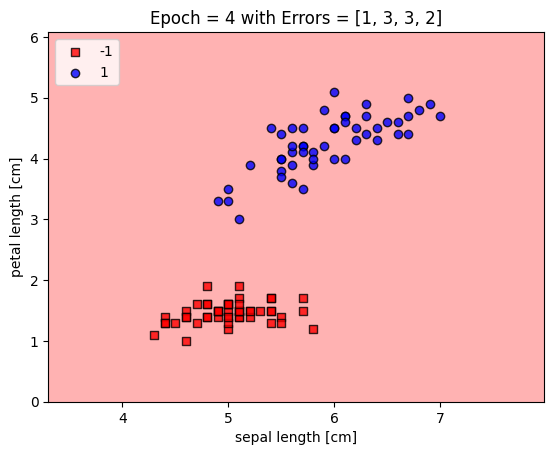

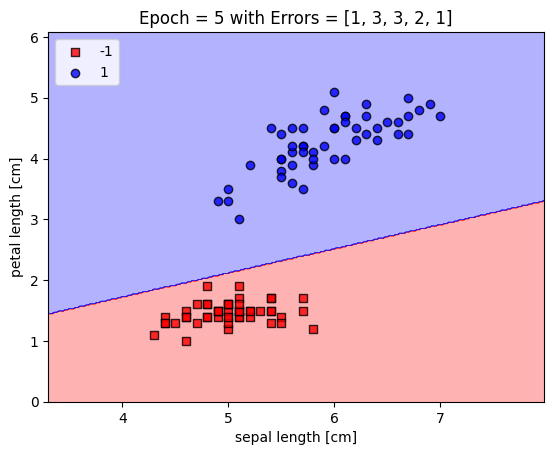

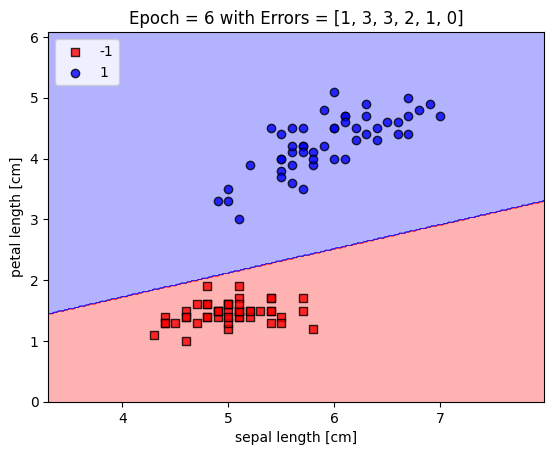

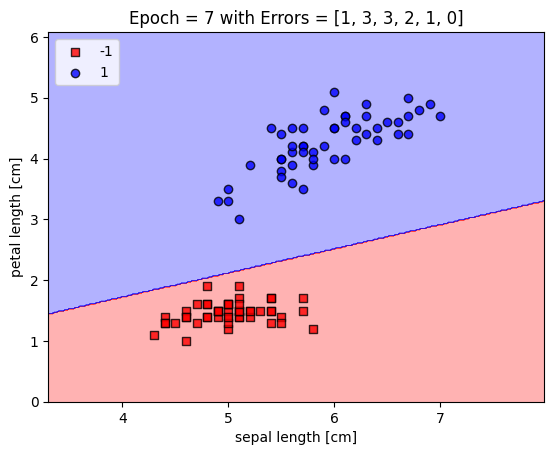

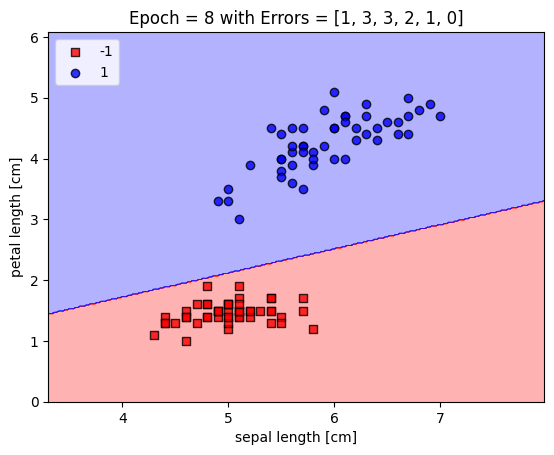

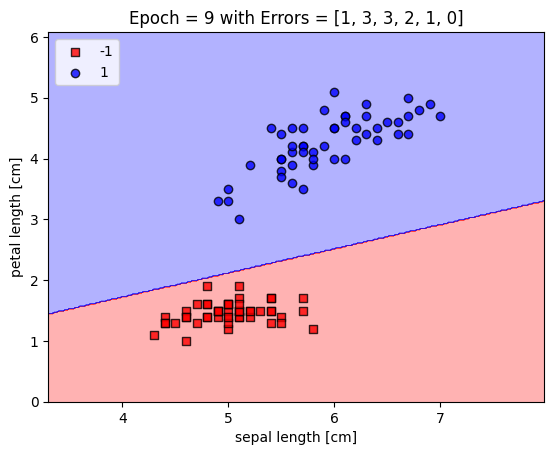

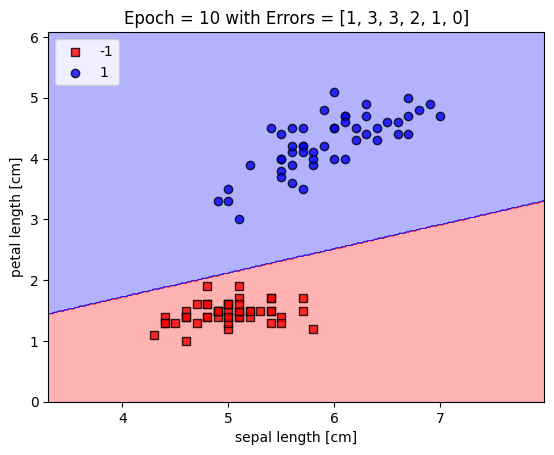

In [18]:
epoch = np.arange(1,11,1)

for i in epoch:
  perc = Perceptron(eta = 0.01, n_iter = i, random_state = 1)
  perc.fit(X,y)
  plot_decision_regions(X, y, classifier=perc)
  plt.xlabel('sepal length [cm]')
  plt.ylabel('petal length [cm]')
  plt.title('Epoch = {} with Errors = {}'.format(i,perc.errors_))
  plt.legend(loc='upper left')
  plt.show()

Turns out that the decision boundary is observed at epoch = 5 which is fine because the next iteration (epoch = 6) is used to verify that updates are no longer required. This can be observed on the title of each graph were Epoch # is displayed with the list of number of errors.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[3,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



The data arrays (X, y) currently in the memory are organized so that all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X, y). In this question we will check the impact of changing the order of the data on the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (permutation) of the data. Please look up the particular functions of the code, see how they work, and then do the required modification and uncomment / evaluate the code.

In [ ]:
# establish a random shuffle
# s = np.arange(10)
# np.random.shuffle(s)
# shuffle sample
# X_shuffle = X[s];
# y_shuffle = y[s];


Modify the code below as follows: <br>
(i) Pick a sufficiently small value of $\eta$, so that convergence takes 20 iterations or more. <br>
(ii) Add an extra line that fits the perceptron on the shuffled data. <br>
(iii) Plot the error for both training processes (the original data and the shuffled data). <br>
(iv) What do you observe?

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

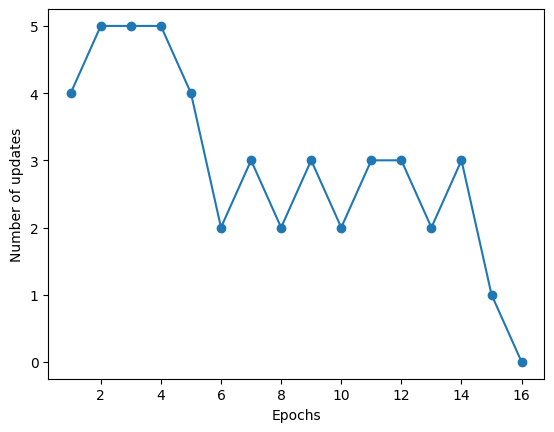

In [51]:

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Give your answers here.

<br>
<br>
<br>
<br>

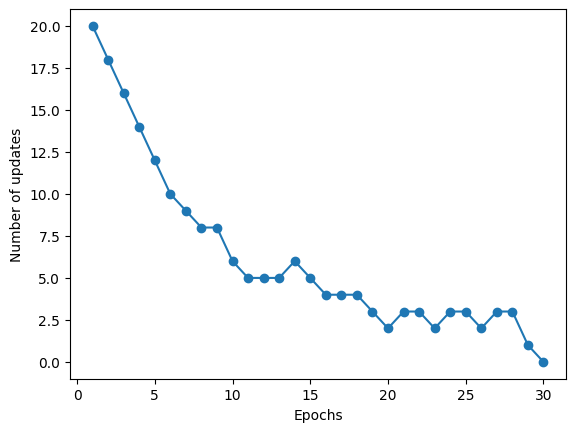

In [19]:
s = np.arange(len(X))
np.random.shuffle(s)
X_shuffle = X[s]
y_shuffle = y[s]

perc = Perceptron(eta = eta_value30, random_state=1)
perc.fit(X,y)
plt.plot(range(1, len(perc.errors_) + 1), perc.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()


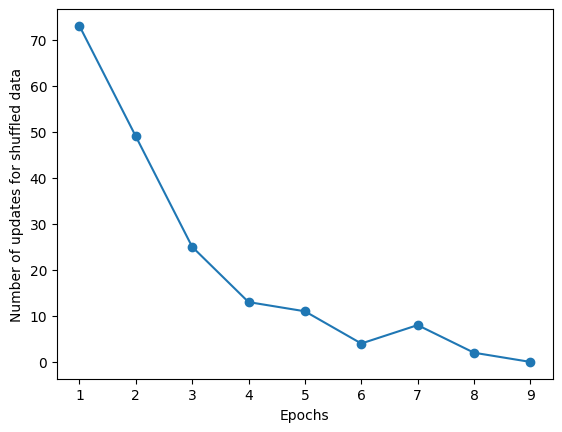

In [20]:
perc.fit(X_shuffle, y_shuffle)
plt.plot(range(1, len(perc.errors_) + 1), perc.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates for shuffled data')

plt.show()

Upon shuffling the dataset, the perceptron algorithm encounters a higher number of errors for its initial values of epoch, leading to faster weight updates and a sooner convergence in terms of the training iterations required.

We observe such a change in this case because the distribution of data in our original dataset contained observable blolbs in a sequential order. When we reshuffled this dataset, we disrupted this trend in the dataset. Now, our perceptron started learning on a generalised distribution of data.

Therefore, it is not necessary that shuffling will always help in reducing the number of epochs required to train the perceptron.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[4,1] =
# M[4,2] =
# M[4,3] =
# M[4,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose that we have a 2-dimensional data set $X$. We transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a$, $b$, $c$ are constant values. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.

If our given data set is linearly separable, does the same hold true for the transformed set? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a$, $b$, $c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set? Are there any issues that might arise?

(1) Give your own answer to the above question.

(2) What happens when you use an LLM such as ChatGPT to answer the question? Was the LLM helpful in resolving it?

(Replace this text by screenshots of the full transcript of your LLM session. Create extra text cells if needed.)

### My answer

Upon applying the linear transformation, our perceptron equation also changes. \\
 $z = w_1 * x_{\text{Trans_1}} + w_2 * x_{\text{Trans_2}} + w_0$  <br>
$z = w_1 ( a X_{j,1} - c ) + w_2 ( b X_{j,2} - c ) + w_0$ <br>
$z = w_1 a X_{j,1} - w_1 c + w_2 b X_{j,2} - w_2 c + w_0$ <br>
$z = w_1 a X_{j,1} + w_2 b X_{j,2} - (w_1 + w_2) c + w_0
$ <br>

The update equations are as follows:

$w_1 := w_1 - \eta*(\hat{y} - y) * x_{\text{Trans_1}}$  <br>
$w_2 := w_2 - \eta*(\hat{y} - y) * x_{\text{Trans_2}}$  <br>
$w_0 := w_0 - \eta*(\hat{y} - y)$ <br>

Comparing it with <br>
$z = w_1 * X_{j,1} + w_2 * X_{j,2} + w_0$

We notice that our weights have been changed. Overall, the equation of the perceptron has altered and will give rise to different values of $\hat{y}$ for each set of data points.



We can observe a translation along with scaling in our above equations. Since, these are applied to each point of the dataset, every point of each column scales and translators by the same factor, maintaining the distribution of the data that was present before the transformation. However, these classes of our dataset may be located far apart or extremely close to eachother depending on the values of a, b and c.

Such linear transformation that still maintains the inherent nature of the distribution of the dataset will still be linearly separable.

The following issues could be encountered, given that eta is constant for now:
* Linear Transformation could increase the complexity of obtaining the decision boundary, requiring a lot more computative power for some values of a, b and c (May reduce it too).
* Transformation could increase or decrease the number of updates and epochs required to train the perceptron, affecting the rate at which our perceptron converges.
* The way our perceptron learns the data has changed because the value of updated weights depends on the transformed value of corresponding X. This again affecting the convergence rate.





In [21]:
print(X.shape)
print(X[:5])
print(y.shape)

(100, 2)
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
(100,)


In [22]:
X_trans = X.copy()

a = 1.5
b = 5
c = 9

for row in X_trans:
  row[0] = a*row[0] - c
  row[1] = b*row[1] - c

In [23]:
X_trans[:5]

array([[-1.35, -2.  ],
       [-1.65, -2.  ],
       [-1.95, -2.5 ],
       [-2.1 , -1.5 ],
       [-1.5 , -2.  ]])

In [30]:
from ipywidgets import interactive

def plot_transformed_X(a=1.5, b=1.3, c=1):
    X_trans = X.copy()
    for row in X_trans:
        row[0] = a * row[0] - c
        row[1] = b * row[1] - c


    perc = Perceptron(eta = eta_value30, random_state=1, n_iter=1000)
    perc.fit(X_trans,y)
    plot_decision_regions(X_trans, y, classifier=perc)
    print("Number of training iterations : {}".format(perc.training_iter))
    print("Number of updates: {}".format(sum(perc.errors_)))


    plt.title('Transformed X with a={}, b={}, c={}'.format(a, b, c))
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

### Crashes because of unavailable ram
'''
a_values = np.arange(-100,100,1).tolist()
b_values = np.arange(-100,100,1).tolist()
c_values = np.arange(-100,100,1).tolist()
'''
a_values = np.arange(-50,50,1).tolist()
b_values = np.arange(-50,50,1).tolist()
c_values = np.arange(-50,50,1).tolist()


interactive_plot = interactive(plot_transformed_X, a=a_values, b=b_values, c=c_values)
display(interactive_plot)


interactive(children=(Dropdown(description='a', options=(-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40…

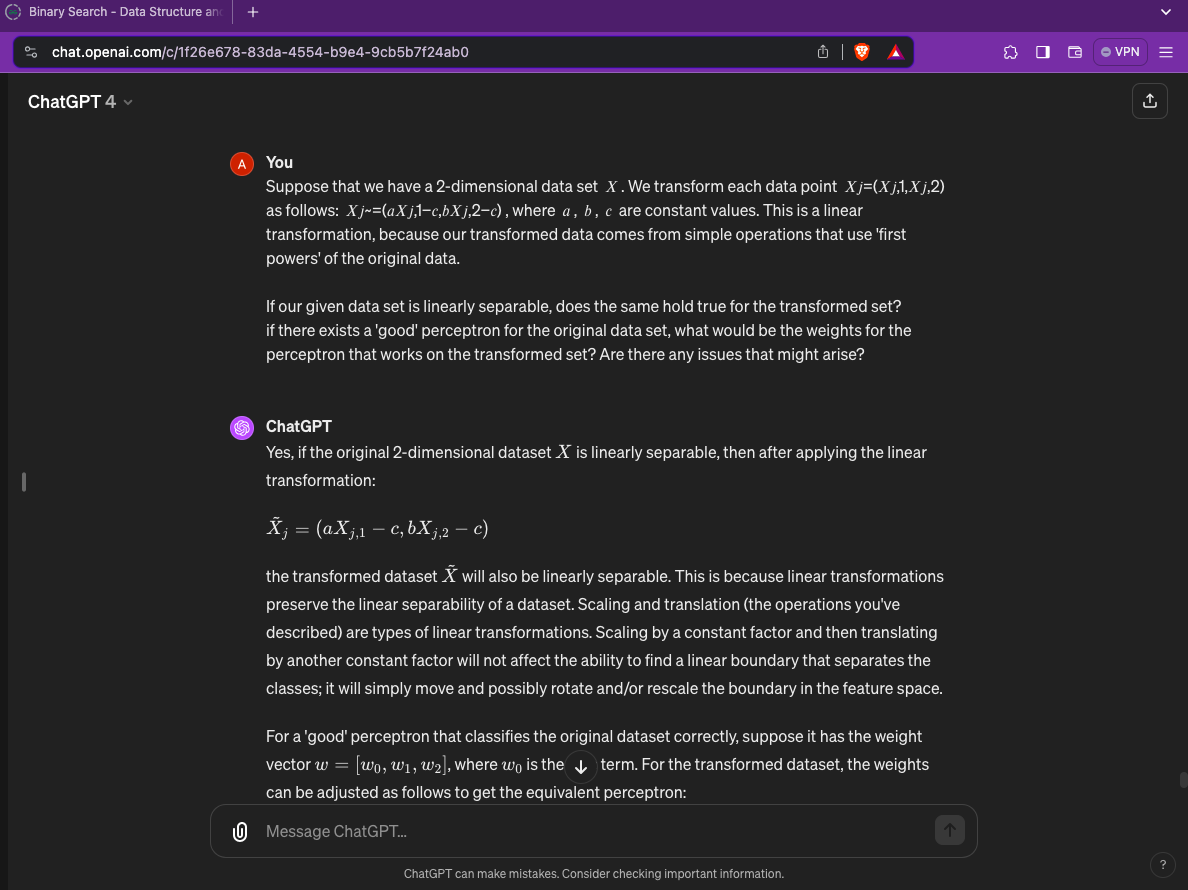

In [28]:
Image('/content/drive/MyDrive/ML/assignment2/Screenshot 2024-02-25 at 4.06.51 PM.png')

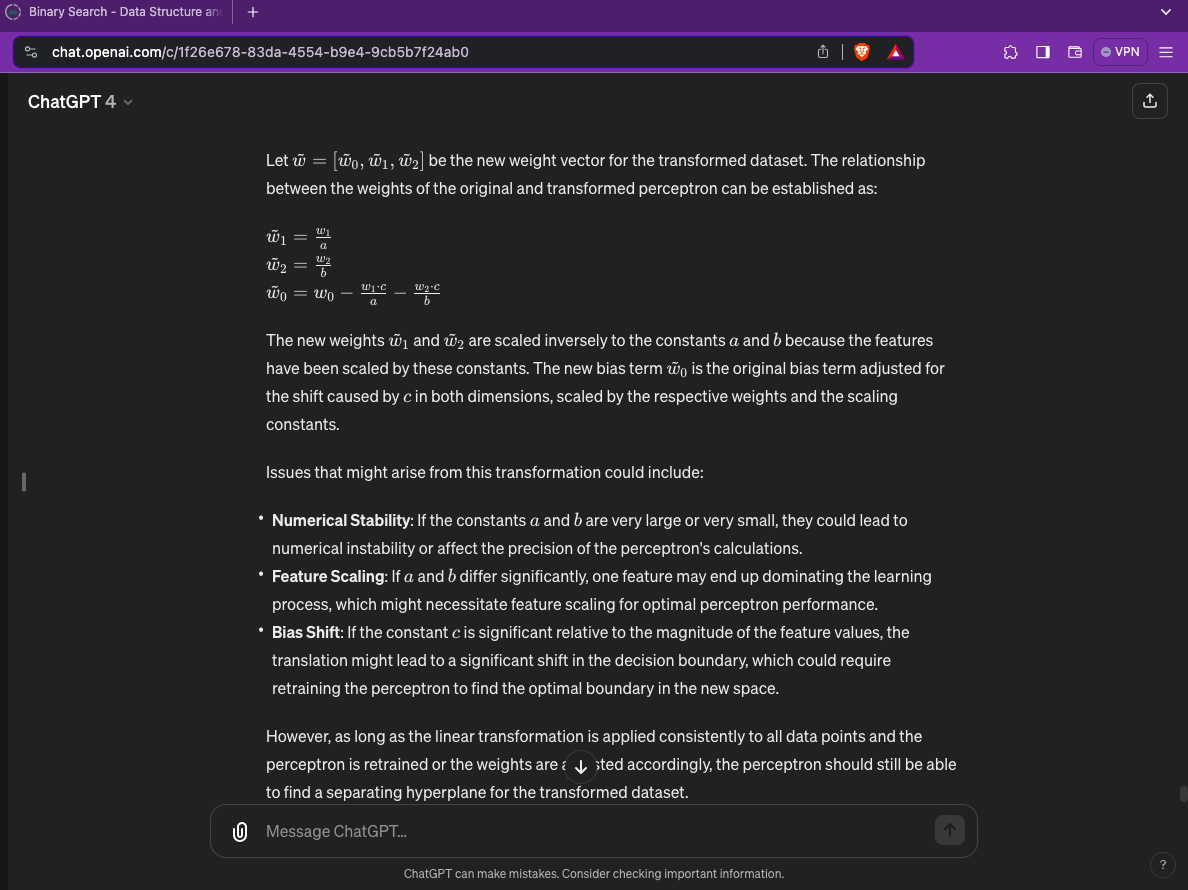

In [29]:
Image('/content/drive/MyDrive/ML/assignment2/Screenshot 2024-02-25 at 4.06.58 PM.png')

GPT4 is useful as it states more points on the issues that one could face upon transformation of dataset. These issues are mostly related to the practical implementation of such techniques, however theoritical knowledge does cover the majority of the answer provided by GPT4.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[5,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [2]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [3]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here

# y_predicted =


In [4]:
X[:5]

array([[ 1.52473556, -0.13811967,  0.23631599],
       [-0.65024483,  1.10823705,  0.9207973 ],
       [ 0.71091857,  1.43765793, -0.98115333],
       [-0.81975995, -0.07869579,  1.32075931],
       [ 0.01195661,  1.73444764, -0.49327043]])

In [5]:
y[:5]

array([[-1.88776433],
       [ 0.71258619],
       [ 0.53725115],
       [ 1.40854252],
       [ 0.71001978]])

### Noticing the format of values in y, I've commented the sigmoid function and its implementation.

In [6]:
#def sigmoid(z):
#    return 1/(1 + np.exp(-z))
# y_predicted = np.where(sigmoid(np.dot(X,w) + b) >= 0.5, 1, 0)

In [7]:
y_predicted = np.dot(X, w.T) + b*1

In [8]:
y_predicted.shape

(10, 1)

In [51]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

#y_ = np.random.randn(10,1)
lr = 0.1

w = w - lr * np.dot((y_predicted - y).T,X)

In [52]:
w

array([[-0.62041182,  1.02289727, -2.34853129]])

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[6,1] =

maxScore = maxScore +4
# M[6,2] =


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore